# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the MEN dataset... 

## Header

Libraries and additional programs

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

## MEN dataset
_The MEN dataset consists of 3,000 word pairs. These were obtained by crowdsourcing using Amazon Mechanical Turk. 
The collection can be used to train and/or test computer algorithms implementing semantic similarity and relatedness measures.
Link for more information: https://staff.fnwi.uva.nl/e.bruni/MEN_

First we find how many pairs are there for which both concepts appear in the McRae dataset. 

In [62]:
def ListConcepts():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    MEN_path = "../Data/MEN_dataset_natural_form_full"
    MEN_file = open(MEN_path, "r")
    MEN = MEN_file.readlines()
    MEN = [str.split(x) for x in MEN]

    MENList = []
    for row in MEN:
        if row[0] in Concepts and row[1] in Concepts:
            MENList.append([row[0], row[1], float(row[2])])
    
    #sort and return
    return sorted(MENList, key = lambda x: x[2])
            
def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))

MENList = ListConcepts()

#MEN_pairs = [x[:2] for x in MENList]   # no se necesita???
MEN_sim = [x[2] for x in MENList]
MEN_names = ListNames(MENList)

print MENList

[['tomato', 'whale', 3.0], ['mirror', 'raspberry', 4.0], ['brick', 'rabbit', 5.0], ['frog', 'subway', 5.0], ['cow', 'table', 6.0], ['pyramid', 'swimsuit', 6.0], ['bread', 'chair', 7.0], ['pillow', 'stone', 7.0], ['airplane', 'guitar', 7.0], ['brick', 'dress', 7.0], ['bucket', 'duck', 8.0], ['cherry', 'lamb', 8.0], ['van', 'vine', 8.0], ['car', 'hawk', 10.0], ['barn', 'mug', 10.0], ['lamb', 'lantern', 12.0], ['owl', 'rocket', 12.0], ['pin', 'truck', 12.0], ['rope', 'train', 13.0], ['door', 'skyscraper', 14.0], ['book', 'building', 14.0], ['lantern', 'oak', 14.0], ['lion', 'pelican', 19.0], ['chicken', 'pepper', 20.0], ['skateboard', 'swimsuit', 20.0], ['key', 'stone', 21.0], ['cherry', 'vine', 22.0], ['pepper', 'strawberry', 24.0], ['barn', 'owl', 24.0], ['deer', 'elephant', 24.0], ['marble', 'wall', 26.0], ['brick', 'skyscraper', 26.0], ['frog', 'whale', 26.0], ['pepper', 'tomato', 27.0], ['giraffe', 'lion', 31.0], ['orange', 'raspberry', 31.0], ['bag', 'pillow', 31.0], ['shirt', 'sock

### a) Visualizing dataset

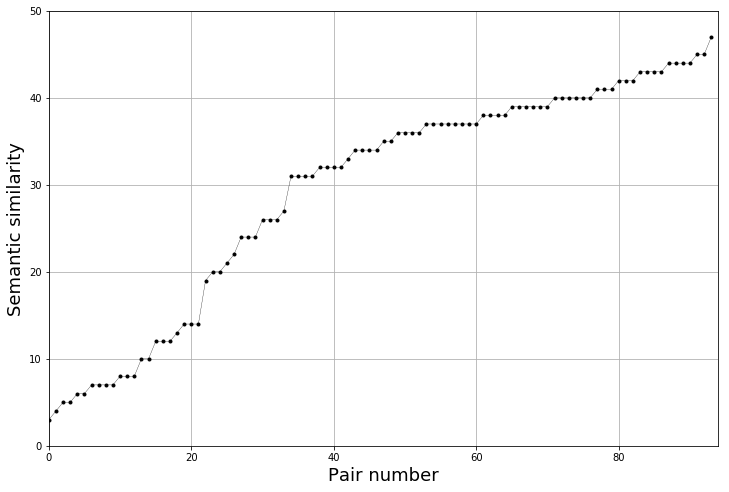

In [63]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in MENList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,94))
plt.ylim((0,50))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-MEN.png', dpi=300)

### b) Encoding dataset

In [64]:
%run EncodingDataset.ipynb

Init_mem('normal', 100, MEN_names)

# List of all concepts in dataset
# Concepts = get_concepts_list()   # SE OCUPA??

Begining to encode dataset...
End of encoding


### b) Measuring similarity

In [65]:
# Create list of distances for each method
HD_sim_MEN = []; McRae_sim_MEN = []; WUP_sim_MEN = []; LCH_sim_MEN = []; RES_sim_MEN = []; JCN_sim_MEN = []
# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in MENList:
    print i,
    HD_sim_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
    #McRae_sim_MEN.append( McRae_simi(pair[0:2]) )
    #WUP_sim_MEN.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    #LCH_sim_MEN.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    #RES_sim_MEN.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    #JCN_sim_MEN.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1
print "End"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 End


### c) Computing correlation

In [66]:
correlations = [['HDC', pearsonr(MEN_sim, HD_sim_MEN)[0]], ['McRae', pearsonr(MEN_sim, McRae_sim_MEN)[0]],
                ['wup', pearsonr(MEN_sim, WUP_sim_MEN)[0]], ['lch', pearsonr(MEN_sim, LCH_sim_MEN)[0]],
                ['res', pearsonr(MEN_sim, RES_sim_MEN)[0]], ['jcn', pearsonr(MEN_sim, JCN_sim_MEN)[0]]]

correlations = sorted(correlations, key = lambda x : x[1], reverse = True)
print correlations

ValueError: operands could not be broadcast together with shapes (94,) (0,) 

### d) Plotting

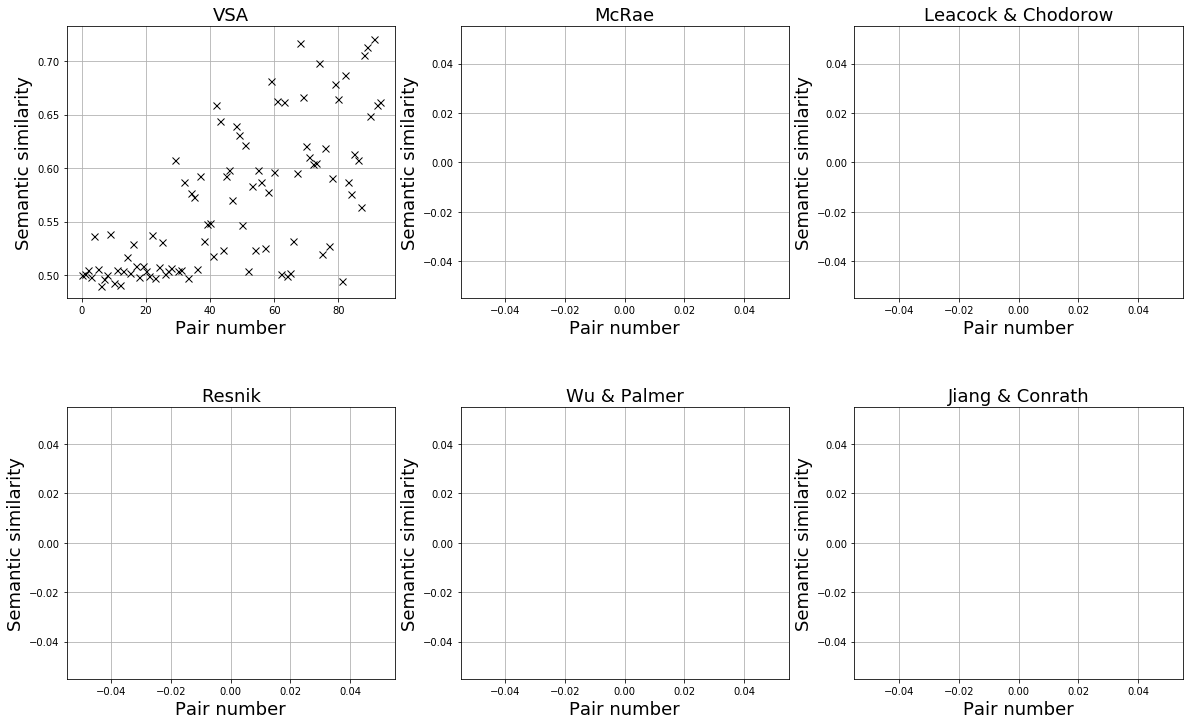

In [ ]:
# Plotting
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_sim_MEN, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_sim_MEN, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(233)
plt.plot(LCH_sim_MEN, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(RES_sim_MEN, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_sim_MEN, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_sim_MEN, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-MEN.png') #, dpi=1000)

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [ ]:
# List of similarity values from dataset...
for mode in ['normal','Rank_PF','Disting','Intercorr_str', 'Intercorr-Rank']:
    for num_f in [6, 8, 10, 12, 15, 20]:
        # Printing current mode:
        print "\n\nMode:", mode, "  Number of features:", num_f
        # Initialize memory
        Init_mem( mode, num_f, MEN_names) 
        # Create list of distances
        HD_MEN = []
        # Loop over all pairs of concepts
        i = 0
 #       print "Starting..."
        for pair in MENList:
  #          print i,
            HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
            i += 1
   #     print "\nDone!"
        
        correlation= pearsonr(MEN_sim, HD_MEN)[0]
        print "   Correlation value: ", correlation



Mode: normal   Number of features: 6
Begining to encode dataset...
End of encoding
   Correlation value:  0.5994430451446175


Mode: normal   Number of features: 8
Begining to encode dataset...
